<a href="https://colab.research.google.com/github/Bala534/Kennedy-ML/blob/master/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data = pd.read_csv('43. Data for Machine Learning.csv')
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,Fly Ash (kg/m3),Slag (%),Rest Period (Hrs.),Curing Temperature (°C),Curing Period (Hrs.),NaOH/Na2SiO3,Superplasticizer (kg/m3),Extra water added (kg/m3),Molarity,Alkaline Activator/ Binder Ratio,Coarse Aggregate (kg/m3),Fine Aggregate (kg/m3),Compressive Strength (Mpa),NaN,NaN,The quintenary influence of alkali-activator-b...
1,NaN,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Y,NaN,NaN,NaN
2,NaN,430,0,24,60,24,0.4,8.6,0,8,0.45,1243,533,32.5,NaN,NaN,NaN
3,NaN,397,0,24,70,24,0.4,7.94,0,8,0.45,1307,547,35,NaN,NaN,NaN
4,NaN,364,0,24,80,24,0.4,7.28,0,8,0.45,1311,562,37,NaN,NaN,NaN


In [38]:
data = data.drop(['Unnamed: 0', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'], axis=1)

In [39]:
data = data.rename(columns=data.iloc[0]).drop(data.index[0])

In [40]:
data.columns

Index(['Fly Ash (kg/m3)', 'Slag (%)', 'Rest Period (Hrs.)',
       'Curing Temperature (°C) ', 'Curing Period (Hrs.) ', 'NaOH/Na2SiO3',
       'Superplasticizer (kg/m3)', 'Extra water added (kg/m3)', 'Molarity',
       'Alkaline Activator/ Binder Ratio ', 'Coarse Aggregate (kg/m3)',
       'Fine Aggregate  (kg/m3)', 'Compressive Strength (Mpa)'],
      dtype='object')

In [41]:
data = data.iloc[1:]

In [42]:
data.shape

(250, 13)

In [43]:
data.columns

Index(['Fly Ash (kg/m3)', 'Slag (%)', 'Rest Period (Hrs.)',
       'Curing Temperature (°C) ', 'Curing Period (Hrs.) ', 'NaOH/Na2SiO3',
       'Superplasticizer (kg/m3)', 'Extra water added (kg/m3)', 'Molarity',
       'Alkaline Activator/ Binder Ratio ', 'Coarse Aggregate (kg/m3)',
       'Fine Aggregate  (kg/m3)', 'Compressive Strength (Mpa)'],
      dtype='object')

In [44]:
ab_columns = ['FA','MS','RP','CT','CP','AR','SP','EWA','M','A/B','CAgg','FAgg','CS']
data.columns = ab_columns

In [45]:
corMat = data.corr(numeric_only = False)
print(corMat)

            FA        MS        RP        CT        CP        AR        SP  \
FA    1.000000 -0.060909 -0.019845  0.131344 -0.234155  0.054141 -0.049253   
MS   -0.060909  1.000000 -0.204696 -0.509291  0.507378  0.089113  0.429008   
RP   -0.019845 -0.204696  1.000000  0.205627 -0.143096 -0.072867  0.136961   
CT    0.131344 -0.509291  0.205627  1.000000 -0.831677 -0.122277 -0.250287   
CP   -0.234155  0.507378 -0.143096 -0.831677  1.000000  0.089247  0.312861   
AR    0.054141  0.089113 -0.072867 -0.122277  0.089247  1.000000 -0.152164   
SP   -0.049253  0.429008  0.136961 -0.250287  0.312861 -0.152164  1.000000   
EWA   0.065675  0.492491 -0.017457 -0.216968  0.331045 -0.097552  0.515820   
M    -0.082572 -0.111529  0.019898  0.073287  0.000046 -0.321522  0.035365   
A/B  -0.450725  0.119791 -0.185964  0.033023 -0.008233  0.227419 -0.103622   
CAgg -0.431613 -0.154147  0.156847  0.226944 -0.238736 -0.209312 -0.145219   
FAgg  0.058405  0.327451 -0.026832 -0.329886  0.418778  0.198642

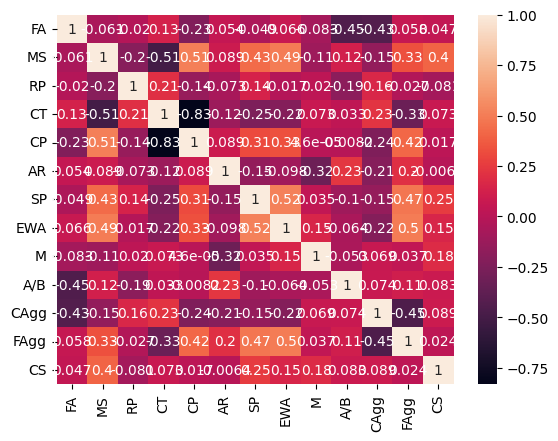

In [46]:
sns.heatmap(corMat, annot=True)
plt.show()

(0.0, 15.0)

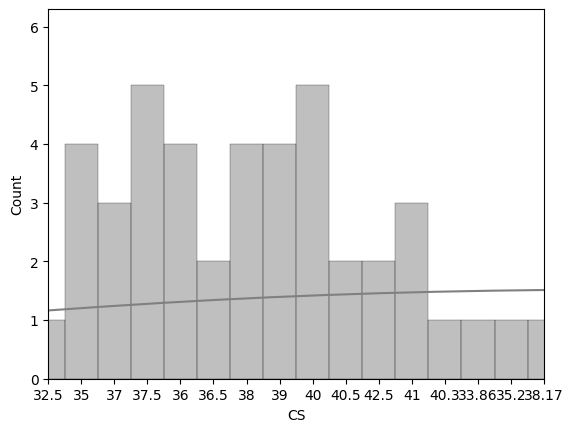

In [47]:
hp = sns.histplot(data=data, x="CS",color='grey',kde=True)
hp.set_xlim(0, 15)

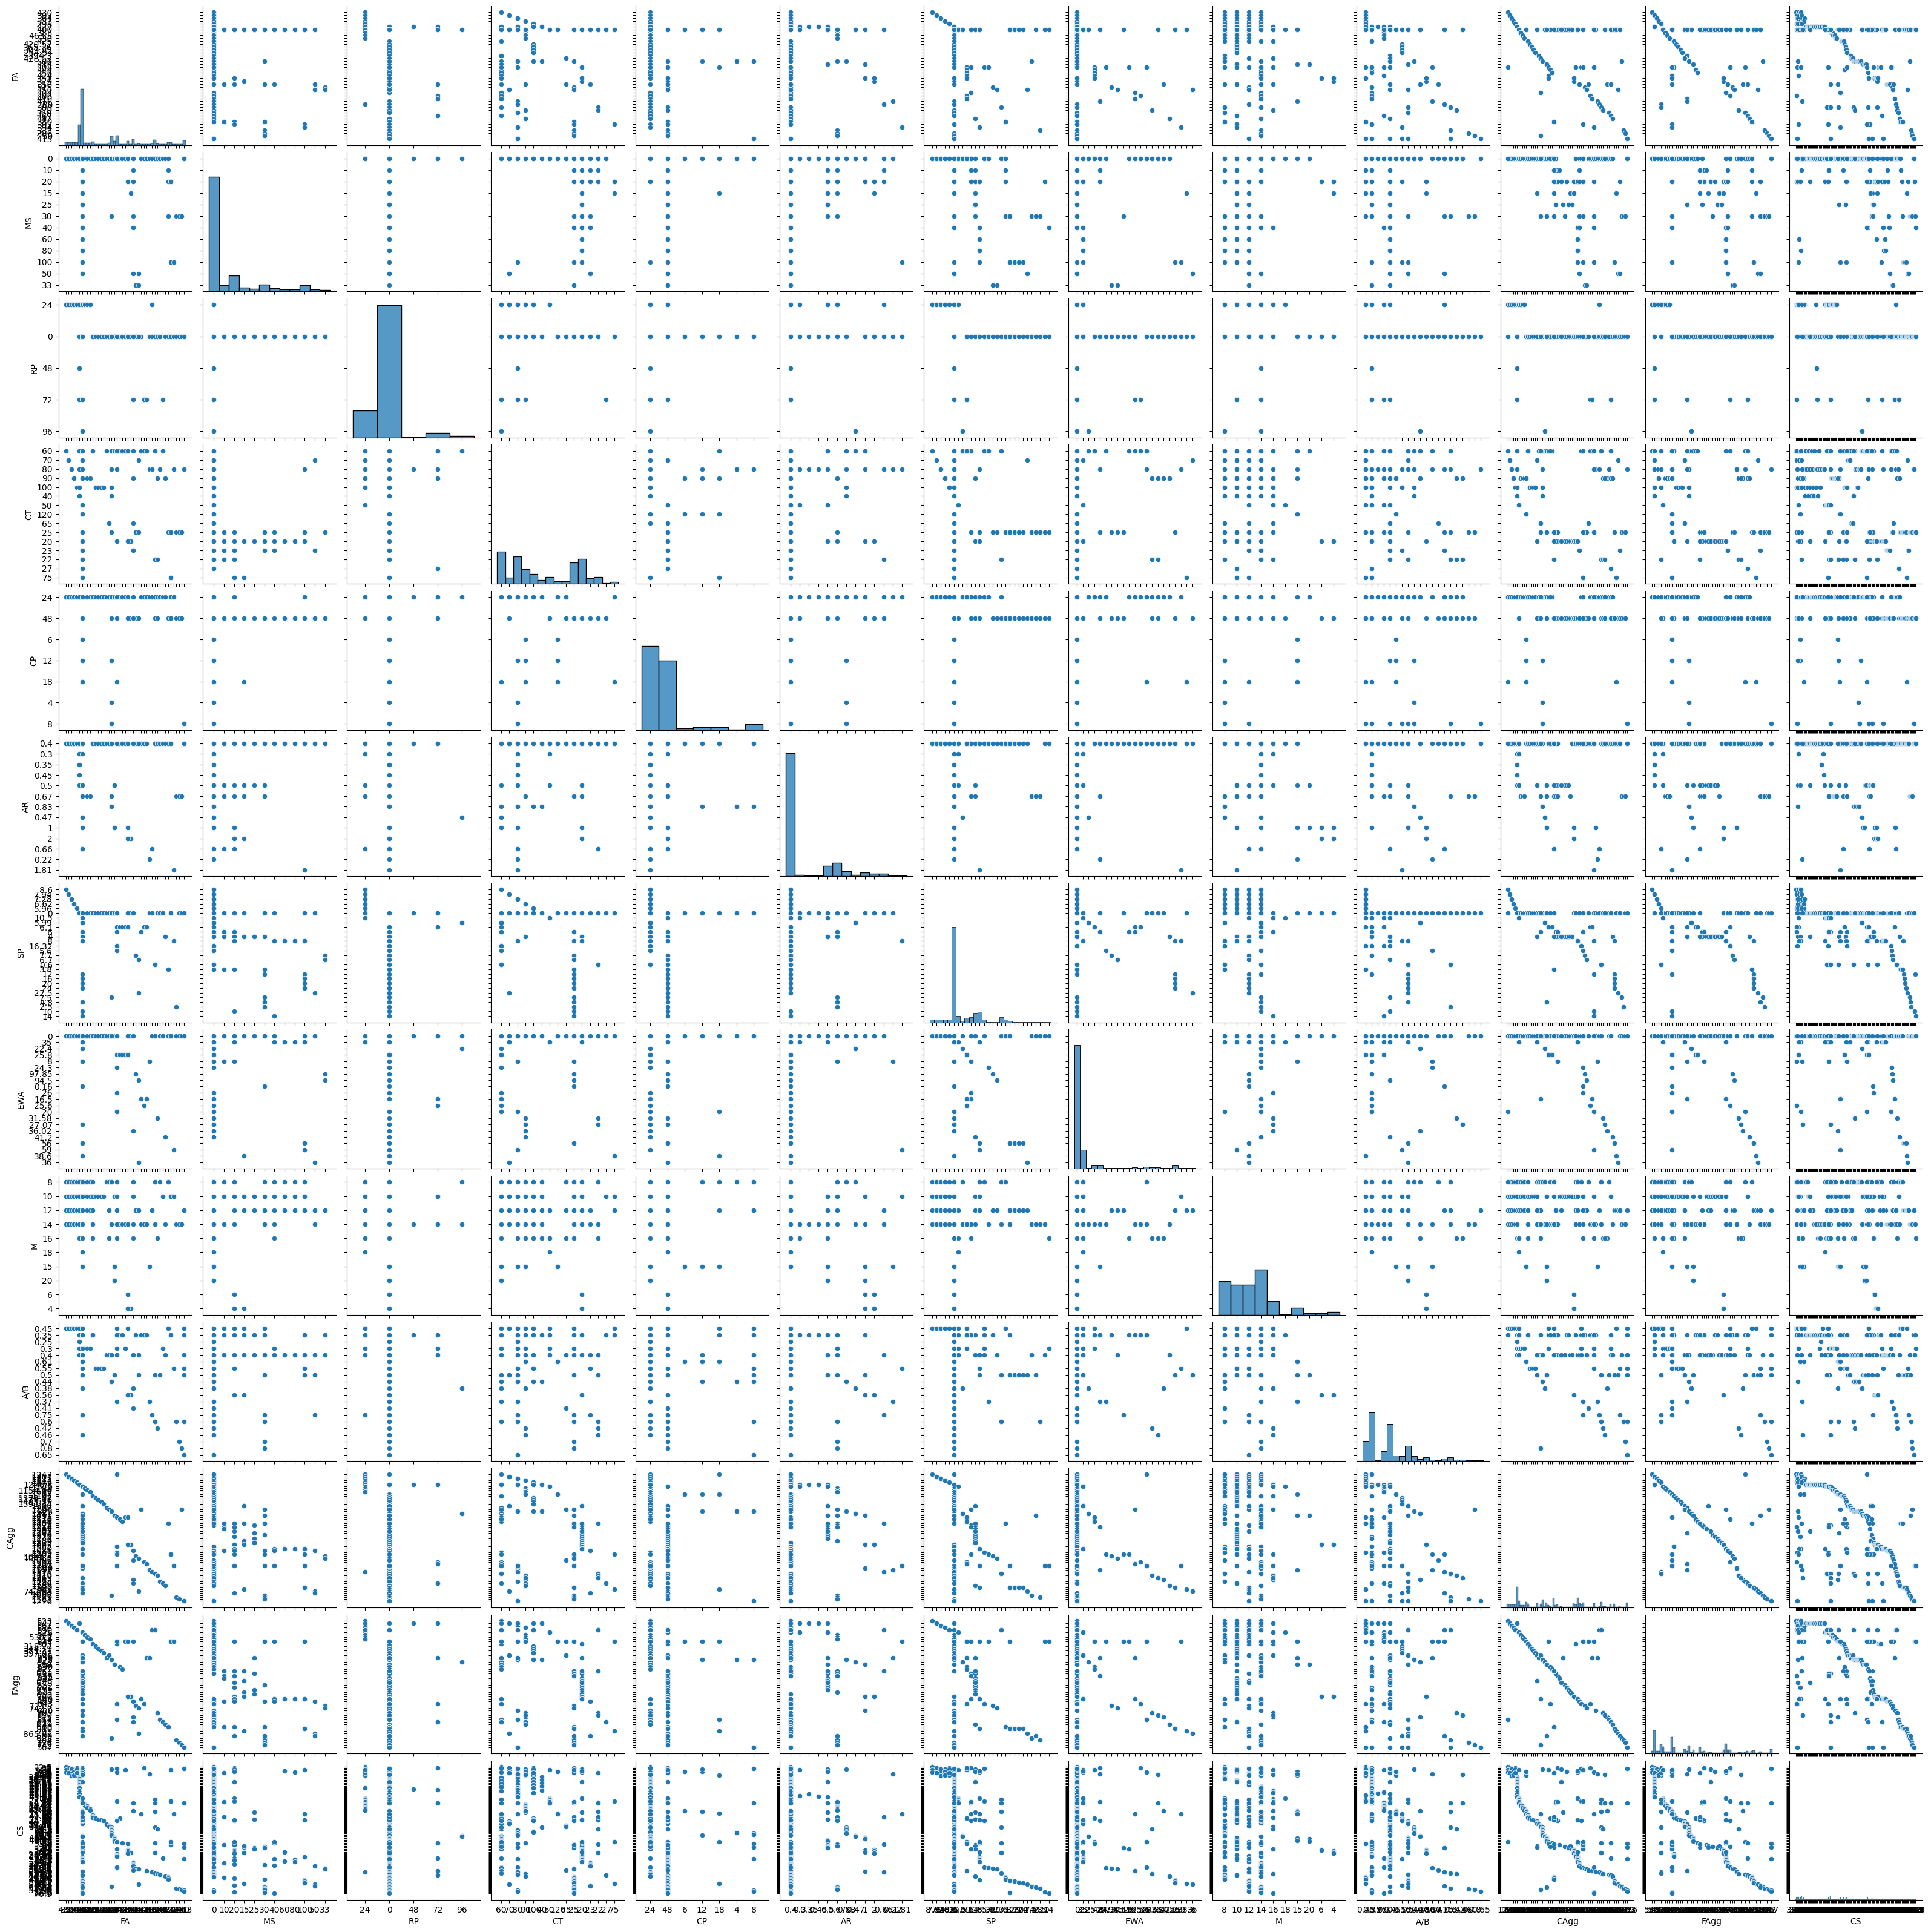

In [48]:
sns.pairplot(data,vars=['FA','MS','RP','CT','CP','AR','SP','EWA','M','A/B','CAgg','FAgg','CS'])

In [49]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [50]:
features = data[['FA','MS','RP','CT','CP','AR','SP','EWA','M','A/B','CAgg','FAgg']].values
labels = data[['CS']].values

In [51]:
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.25)

In [52]:
model =SVR(kernel='linear')
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [53]:
y_pred = model.predict(x_test)
y_pred

array([36.82418553, 33.461923  , 28.38742156, 45.86450755, 51.48532914,
       45.72149725, 32.92255283, 42.72883269, 40.71459773, 35.14179246,
       46.82756832, 32.20927428, 40.90598212, 41.07091062, 34.47492283,
       47.50539878, 29.35466433, 31.75431066, 40.81184181, 33.12485984,
       35.62308125, 31.26072731, 36.93698581, 39.28966919, 46.02224088,
       44.59538622, 33.88629558, 45.60238189, 41.20044503, 33.96659138,
       46.90474568, 42.35778719, 38.92717016, 43.81543426, 42.06256284,
       40.83323314, 31.15294066, 32.47032789, 31.25427616, 40.03098674,
       33.03499496, 43.69143284, 19.06594388, 14.97560268, 37.04662037,
       41.06018905, 40.94137621, 28.86862772, 42.3114504 , 41.37617699,
       42.12117352, 52.62293464, 37.51584811, 47.50844489, 38.27606885,
       39.98938638, 42.60542103, 46.17424412, 33.20793961, 47.56028582,
       41.45946236, 35.07307042, 35.14055738])

In [54]:
mean_absolute_error(y_test,y_pred)

7.250503668033813

In [55]:
mean_squared_error(y_test,y_pred)

110.96695461291651

In [56]:
mean_absolute_percentage_error(y_test, y_pred)

0.20651923307621634

In [57]:
from math import sqrt
rmse = sqrt(mean_squared_error(y_test,y_pred)) # calculating the root mean squared error for actual and predicted values
rmse

10.534085371446185

In [58]:
r2_score(y_test,y_pred)

0.12460174136541013

In [59]:
x1 = np.array(['MAE','MSE','RMSE','R2_error','MAPE'])
y1 = np.array([7.2,94.7,9.7,0.2,0.2])

Text(0, 0.5, 'value')

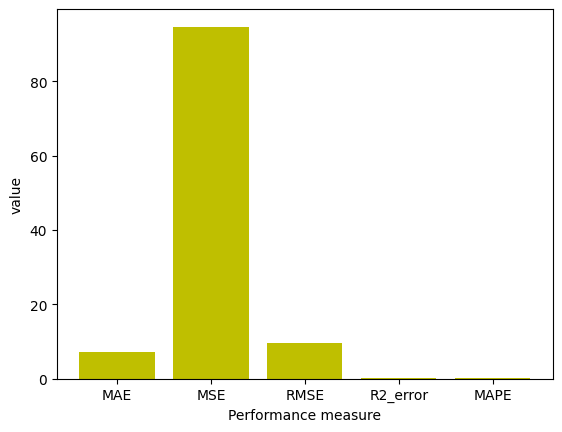

In [60]:
plt.bar(x1,y1,color='y')
plt.xlabel('Performance measure')
plt.ylabel('value')

In [61]:
from sklearn.model_selection import cross_validate,KFold,cross_val_score

In [62]:
cross_val_score(SVR(),features,labels).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

-0.18869536895404818

In [63]:
a = data['CS'].tail(63)
b = y_pred

(0.0, 14.0)

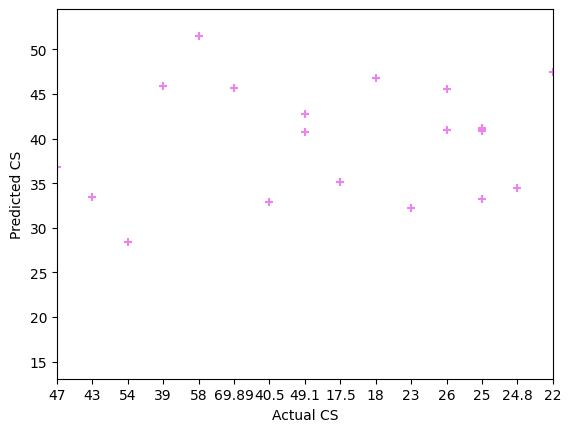

In [64]:
plt.scatter(a,b,color='violet',marker='+')
plt.xlabel('Actual CS')
plt.ylabel('Predicted CS')
plt.xlim(0, 14)

(0.0, 20.0)

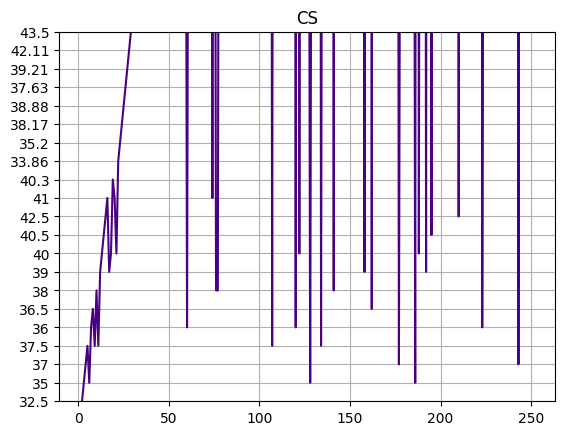

In [65]:
z = data['CS']
plt.plot(z,color='indigo')
plt.title('CS')
plt.grid()
plt.ylim(0,20)

In [66]:
from sklearn.datasets import make_regression
from xgboost import XGBRegressor

M, n = make_regression(n_samples=500, n_features=12, n_informative=2, noise=0.3)
M = pd.DataFrame(M, columns=['FA','MS','RP','CT','CP','AR','SP','EWA','M','A/B','CAgg','FAgg'])

model = XGBRegressor()
model.fit(M, n)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

<ipython-input-67-a6f318bcb26d>:28: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([mini, maxi])


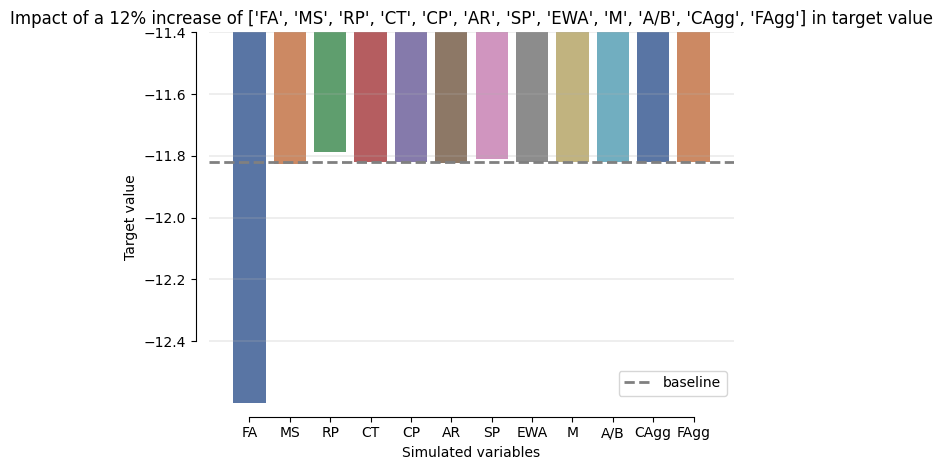

In [67]:
class Simulate:
    def __init__(self, obs, var):
        self.obs = obs
        self.var = var

    def simulate_increase(self, model, percentage):
        baseline = model.predict(self.obs)
        plus = {}
        for ivar in self.var:
            M_plus = self.obs.copy()
            M_plus[ivar] = M_plus[ivar] + M_plus[ivar] * (percentage / 100)
            plus[ivar] = model.predict(M_plus)
        b = pd.DataFrame(
            plus, index=['simulated'
                         ]).T.reset_index().rename(columns={'index': 'test'})
        b['baseline'] = baseline[0]
        return b

    @staticmethod
    def plot_simulation(d, **kwargs):
        fig, ax = plt.subplots()
        sns.barplot(x='test', y='simulated', data=d, palette='deep', ax=ax)
        ax.axhline(d['baseline'].values[0], color='grey', linestyle='--', linewidth=2)
        ax.plot([0, 0], [-100, -100], color='grey', linestyle='--', linewidth=2, label='baseline')

        maxi = int(d['simulated'].max() + d['simulated'].max() * 0.1)
        mini = int(d['simulated'].min() - d['simulated'].min() * 0.1)
        ax.set_ylim([mini, maxi])

        ax.set_xlabel('Simulated variables')
        ax.set_ylabel('Target value')
        ax.set_title(kwargs.get('title'))
        ax.legend()

        ax.grid(axis='y', linewidth=.3)
        sns.despine(offset=10, trim=True)
        plt.tight_layout()
        plt.show()

VAR_OPTIMIZE = ['FA','MS','RP','CT','CP','AR','SP','EWA','M','A/B','CAgg','FAgg']
PERC = 12
ROW = M.iloc[[29]]

S = Simulate(obs=ROW, var=VAR_OPTIMIZE)
d = S.simulate_increase(model=model, percentage=PERC)
S.plot_simulation(d, title=f'Impact of a {PERC}% increase of {VAR_OPTIMIZE} in target value')

Automatically created module for IPython interactive environment


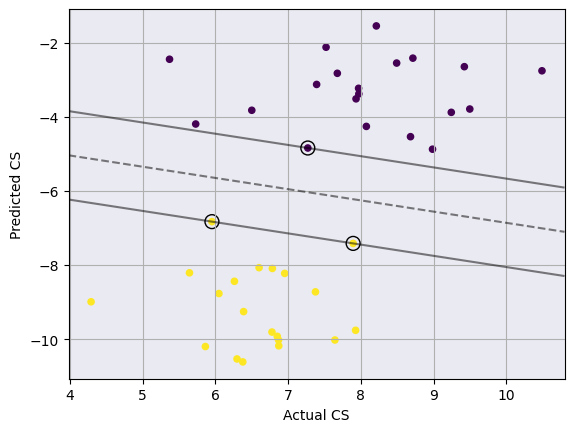

In [68]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 30 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=20)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 40)
yy = np.linspace(ylim[0], ylim[1], 40)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['-', '--', '-'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.xlabel('Actual CS')
plt.ylabel('Predicted CS')
plt.grid()
ax.set_facecolor('#EAEAF2')

plt.show()